In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv('../data/pima-indians-diabetes.csv')
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# 1st 줄부터 데이터면 names 지정
df = pd.read_csv('../data/pima-indians-diabetes.csv', names=['pregnant', 'plasma', 'pressure',
                'thickness', 'insulin', 'bmi', 'pedigree', 'age', 'class'])
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.head(3)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [9]:
df.tail()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
df.tail(10)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df[['pregnant', 'class']] # column listing

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [15]:
# 데이터 가공 위해 groupby 매우 중요
# groupby의 결과는 groupby 객체

preg_df = df[['pregnant', 'class']]
preg_group = preg_df.groupby(['pregnant'])
preg_group

In [16]:
preg_group.mean() # 임신 횟수 별 당뇨병 평균 구할 수 있음

,class
pregnant,
0,0.342342
1,0.214815
2,0.184466
3,0.360000
4,0.338235
5,0.368421
6,0.320000
7,0.555556
8,0.578947


In [18]:
preg_df = df[['pregnant', 'class']]
preg_group = preg_df.groupby(['pregnant'], as_index=False) # 일반 클래스로 바꾸기
preg_group.mean()

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [19]:
preg_group.count()

,pregnant,class
0,0,111
1,1,135
2,2,103
3,3,75
4,4,68
5,5,57
6,6,50
7,7,45
8,8,38
9,9,28


In [20]:
preg_group.sum()

,pregnant,class
0,0,38
1,1,29
2,2,19
3,3,27
4,4,23
5,5,21
6,6,16
7,7,25
8,8,22
9,9,18


In [ ]:
'''
문제] 과거 임신 횟수 별 당뇨병 여부 결과를 'pregnant', 'count', 'sum', 'mean' 칼럼으로 표현하는
        데이터프레임을 만들고 그 내용을 보이는 코드를 작성하세요.
'''

In [29]:
df = pd.DataFrame()
df['pregnant'] = preg_group.count()['pregnant']
df['count'] = preg_group.count()['class']
df['sum'] = preg_group.sum()['class']
df['mean'] = preg_group.mean()['class']
df

,pregnant,count,sum,mean
0,0,111,38,0.342342
1,1,135,29,0.214815
2,2,103,19,0.184466
3,3,75,27,0.360000
4,4,68,23,0.338235
5,5,57,21,0.368421
6,6,50,16,0.320000
7,7,45,25,0.555556
8,8,38,22,0.578947
9,9,28,18,0.642857


In [34]:
df.sort_values(by='count')

,pregnant,count,sum,mean
16,17,1,1,1.000000
15,15,1,1,1.000000
14,14,2,2,1.000000
12,12,9,4,0.444444
13,13,10,5,0.500000
11,11,11,7,0.636364
10,10,24,10,0.416667
9,9,28,18,0.642857
8,8,38,22,0.578947
7,7,45,25,0.555556


In [35]:
df.sort_values(by='count', ascending=False)

,pregnant,count,sum,mean
1,1,135,29,0.214815
0,0,111,38,0.342342
2,2,103,19,0.184466
3,3,75,27,0.360000
4,4,68,23,0.338235
5,5,57,21,0.368421
6,6,50,16,0.320000
7,7,45,25,0.555556
8,8,38,22,0.578947
9,9,28,18,0.642857


In [33]:
df.sort_values(by='mean', ascending=False)

,pregnant,count,sum,mean
16,17,1,1,1.000000
15,15,1,1,1.000000
14,14,2,2,1.000000
9,9,28,18,0.642857
11,11,11,7,0.636364
8,8,38,22,0.578947
7,7,45,25,0.555556
13,13,10,5,0.500000
12,12,9,4,0.444444
10,10,24,10,0.416667


In [36]:
df = pd.read_csv('../data/pima-indians-diabetes.csv', names=['pregnant', 'plasma', 'pressure',
                'thickness', 'insulin', 'bmi', 'pedigree', 'age', 'class'])
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [37]:
# 매우 중요한 메서드
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


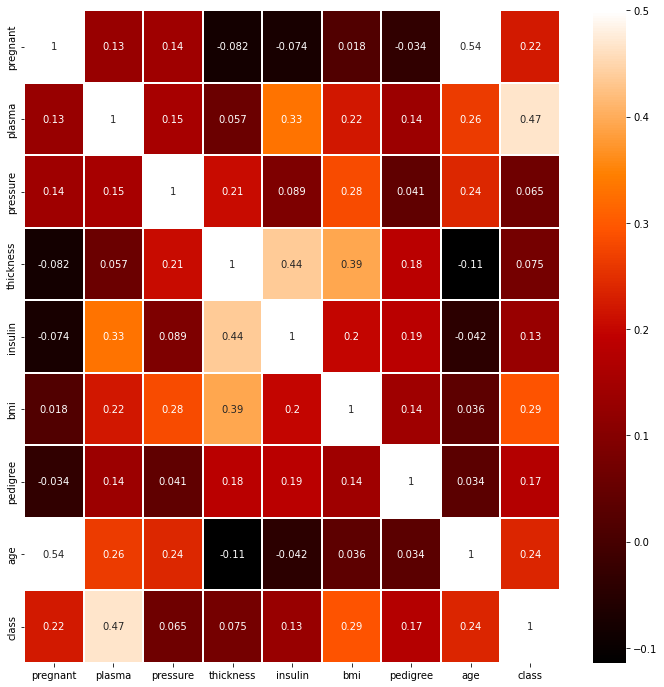

In [41]:
plt.figure(figsize=(12, 12))

sns.heatmap(df.corr(), linewidth=0.1, linecolor='white', vmax=0.5, cmap=plt.cm.gist_heat, annot=True)

plt.show()

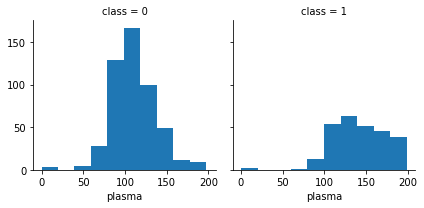

In [42]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [43]:
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
'''
문제] 피마 인디언 데이터프레임을 이용하여 훈련 데이터 셋을 추출하는 코드를 작성하세요.
'''

In [45]:
df = pd.read_csv('../data/pima-indians-diabetes.csv', names=['pregnant', 'plasma', 'pressure',
                'thickness', 'insulin', 'bmi', 'pedigree', 'age', 'class'])

dataset = df.values
X = dataset[:,:8]
Y = dataset[:, 8]

print(dataset.shape, dataset.dtype)
print(X.shape, X.dtype)
print(Y.shape, Y.dtype)

(768, 9) float64
(768, 8) float64
(768,) float64


In [47]:
np.random.seed(1234)
tf.random.set_seed(1234)

In [55]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 1s 2ms/step - loss: 6.2153 - accuracy: 0.5664
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 1.6408 - accuracy: 0.5977
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8908 - accuracy: 0.6003
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7639 - accuracy: 0.6159
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7428 - accuracy: 0.6250
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.6367
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6771
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.6901
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.6875
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6706
Epoch 11/

77/77 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7344: 0s - loss: 0.5090 - accuracy: 0.
Epoch 83/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.7357
Epoch 84/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5390 - accuracy: 0.7487
Epoch 85/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.7188
Epoch 86/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.7474
Epoch 87/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5288 - accuracy: 0.7604
Epoch 88/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5600 - accuracy: 0.7227
Epoch 89/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7474
Epoch 90/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.7435
Epoch 91/200
77/77 [==============================] - 0s 1ms/step - loss: 0.532

77/77 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.7630
Epoch 164/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7604
Epoch 165/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7669
Epoch 166/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.7708
Epoch 167/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7630
Epoch 168/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.7669
Epoch 169/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4901 - accuracy: 0.7760
Epoch 170/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.7578
Epoch 171/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7539
Epoch 172/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7721
Epoc

In [ ]:
'''
문제] 피마 인디언 당뇨병 예측 모델의 정확도를 80% 이상이 되도록 모델을 수정하고 그 결과를 보이는 코드를 작성하세요.
'''

In [53]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=400, batch_size=10)

Epoch 1/400
77/77 [==============================] - 1s 1ms/step - loss: 7.3872 - accuracy: 0.3503
Epoch 2/400
77/77 [==============================] - 0s 1ms/step - loss: 1.3351 - accuracy: 0.4609
Epoch 3/400
77/77 [==============================] - 0s 1ms/step - loss: 0.7625 - accuracy: 0.6302
Epoch 4/400
77/77 [==============================] - 0s 1ms/step - loss: 0.6629 - accuracy: 0.6667
Epoch 5/400
77/77 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.6628
Epoch 6/400
77/77 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.6549
Epoch 7/400
77/77 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.6589
Epoch 8/400
77/77 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6784
Epoch 9/400
77/77 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.6562
Epoch 10/400
77/77 [==============================] - 0s 1ms/step - loss: 0.6211 - accuracy: 0.6719
Epoch 11/

77/77 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.7474
Epoch 83/400
77/77 [==============================] - 0s 1ms/step - loss: 0.5073 - accuracy: 0.7578
Epoch 84/400
77/77 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7578
Epoch 85/400
77/77 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7539
Epoch 86/400
77/77 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7513
Epoch 87/400
77/77 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7591
Epoch 88/400
77/77 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7643
Epoch 89/400
77/77 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7565
Epoch 90/400
77/77 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7565
Epoch 91/400
77/77 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.7500
Epoch 92/400


77/77 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7773
Epoch 164/400
77/77 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7747
Epoch 165/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7878
Epoch 166/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.7865
Epoch 167/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7734
Epoch 168/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7826
Epoch 169/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.7826
Epoch 170/400
77/77 [==============================] - ETA: 0s - loss: 0.4641 - accuracy: 0.79 - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7917
Epoch 171/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.7799
Epoch 172/400
77/77 [==============================] - 0s 1ms/s

77/77 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.7930
Epoch 242/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.7878
Epoch 243/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.8047
Epoch 244/400
77/77 [==============================] - ETA: 0s - loss: 0.4821 - accuracy: 0.78 - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7878
Epoch 245/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.8021
Epoch 246/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7799
Epoch 247/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4600 - accuracy: 0.7878
Epoch 248/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.7878
Epoch 249/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.7982
Epoch 250/400
77/77 [==============================] - 0s 1ms/s

77/77 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8047
Epoch 321/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.7956
Epoch 322/400
77/77 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8177
Epoch 323/400
77/77 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8125
Epoch 324/400
77/77 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8125
Epoch 325/400
77/77 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8047
Epoch 326/400
77/77 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8047
Epoch 327/400
77/77 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.8021
Epoch 328/400
77/77 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8151
Epoch 329/400
77/77 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8138
Epoc

77/77 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8047


In [ ]:
# teacher
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=500, batch_size=50)